In [1]:
# Loading the newly uploaded dataset to begin the project step by step
import pandas as pd

# File path of the new dataset
file_path = 'Covid Live.csv'
covid_data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset to understand its structure
covid_data.head()


,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,1,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"
3,4,Brazil,"34,706,757","686,027",NaN,"33,838,636","182,094","8,318","161,162","3,186","63,776,166","296,146","215,353,593"
4,5,Germany,"33,312,373","149,948",NaN,"32,315,200","847,225","1,406","397,126","1,788","122,332,384","1,458,359","83,883,596"


In [2]:
# Renaming columns for clarity and removing any line breaks or extra characters in names
covid_data.columns = [
    "Rank", "Country", "Total_Cases", "Total_Deaths", "New_Deaths",
    "Total_Recovered", "Active_Cases", "Serious_Critical",
    "Cases_per_Million", "Deaths_per_Million", "Total_Tests",
    "Tests_per_Million", "Population"
]

# Removing commas and converting relevant columns to numeric data types where possible
for column in ["Total_Cases", "Total_Deaths", "Total_Recovered", "Active_Cases",
               "Cases_per_Million", "Deaths_per_Million", "Total_Tests",
               "Tests_per_Million", "Population"]:
    covid_data[column] = pd.to_numeric(covid_data[column].str.replace(',', ''), errors='coerce')

# Display the cleaned structure of the dataset
covid_data_info_cleaned = covid_data.info()
covid_data_head_cleaned = covid_data.head()

covid_data_info_cleaned, covid_data_head_cleaned


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                230 non-null    int64  
 1   Country             230 non-null    object 
 2   Total_Cases         230 non-null    int64  
 3   Total_Deaths        225 non-null    float64
 4   New_Deaths          3 non-null      float64
 5   Total_Recovered     214 non-null    float64
 6   Active_Cases        215 non-null    float64
 7   Serious_Critical    147 non-null    object 
 8   Cases_per_Million   228 non-null    float64
 9   Deaths_per_Million  223 non-null    float64
 10  Total_Tests         214 non-null    float64
 11  Tests_per_Million   214 non-null    float64
 12  Population          228 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 23.5+ KB


(None,
    Rank  Country  Total_Cases  Total_Deaths  New_Deaths  Total_Recovered  \
 0     1      USA     98166904     1084282.0         NaN       94962112.0   
 1     2    India     44587307      528629.0         NaN       44019095.0   
 2     3   France     35342950      155078.0         NaN       34527115.0   
 3     4   Brazil     34706757      686027.0         NaN       33838636.0   
 4     5  Germany     33312373      149948.0         NaN       32315200.0   
 
    Active_Cases Serious_Critical  Cases_per_Million  Deaths_per_Million  \
 0     2120510.0            2,970           293206.0              3239.0   
 1       39583.0              698            31698.0               376.0   
 2      660757.0              869           538892.0              2365.0   
 3      182094.0            8,318           161162.0              3186.0   
 4      847225.0            1,406           397126.0              1788.0   
 
     Total_Tests  Tests_per_Million    Population  
 0  1.118159e+09   

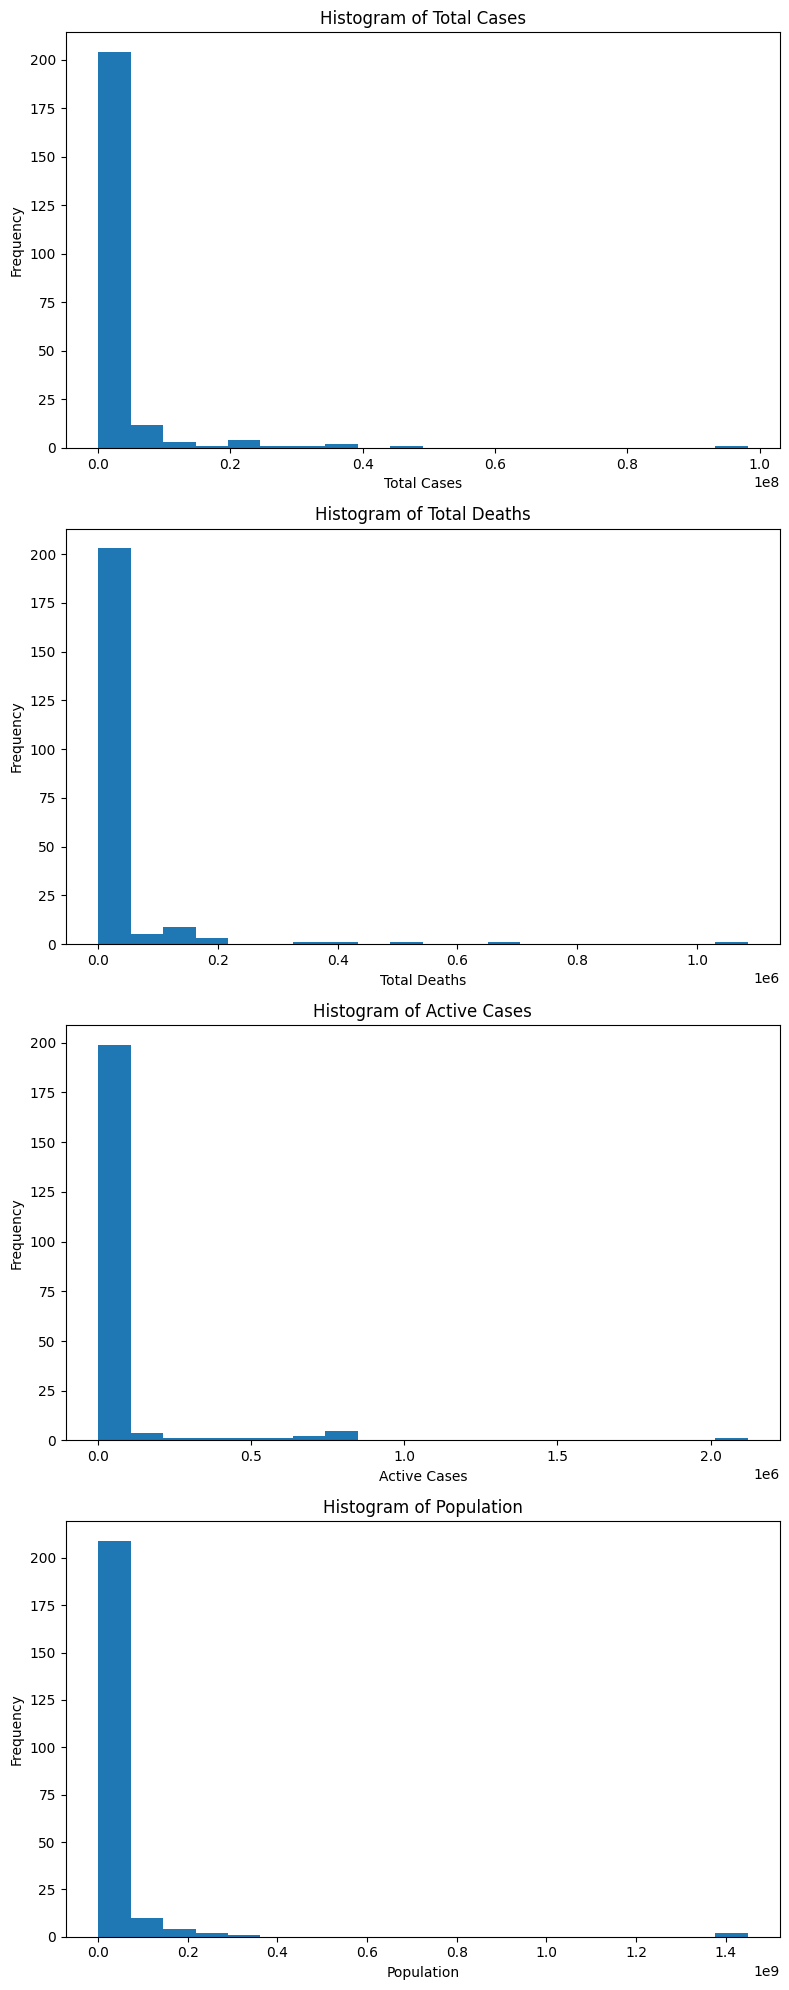

In [3]:
import matplotlib.pyplot as plt

# Summary statistics for numeric columns
summary_statistics = covid_data.describe()

# Creating histograms for Total Cases, Total Deaths, Active Cases, and Population
fig, axs = plt.subplots(4, 1, figsize=(8, 20))

# Histogram for Total Cases
axs[0].hist(covid_data['Total_Cases'].dropna(), bins=20)
axs[0].set_title('Histogram of Total Cases')
axs[0].set_xlabel('Total Cases')
axs[0].set_ylabel('Frequency')

# Histogram for Total Deaths
axs[1].hist(covid_data['Total_Deaths'].dropna(), bins=20)
axs[1].set_title('Histogram of Total Deaths')
axs[1].set_xlabel('Total Deaths')
axs[1].set_ylabel('Frequency')

# Histogram for Active Cases
axs[2].hist(covid_data['Active_Cases'].dropna(), bins=20)
axs[2].set_title('Histogram of Active Cases')
axs[2].set_xlabel('Active Cases')
axs[2].set_ylabel('Frequency')

# Histogram for Population
axs[3].hist(covid_data['Population'].dropna(), bins=20)
axs[3].set_title('Histogram of Population')
axs[3].set_xlabel('Population')
axs[3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


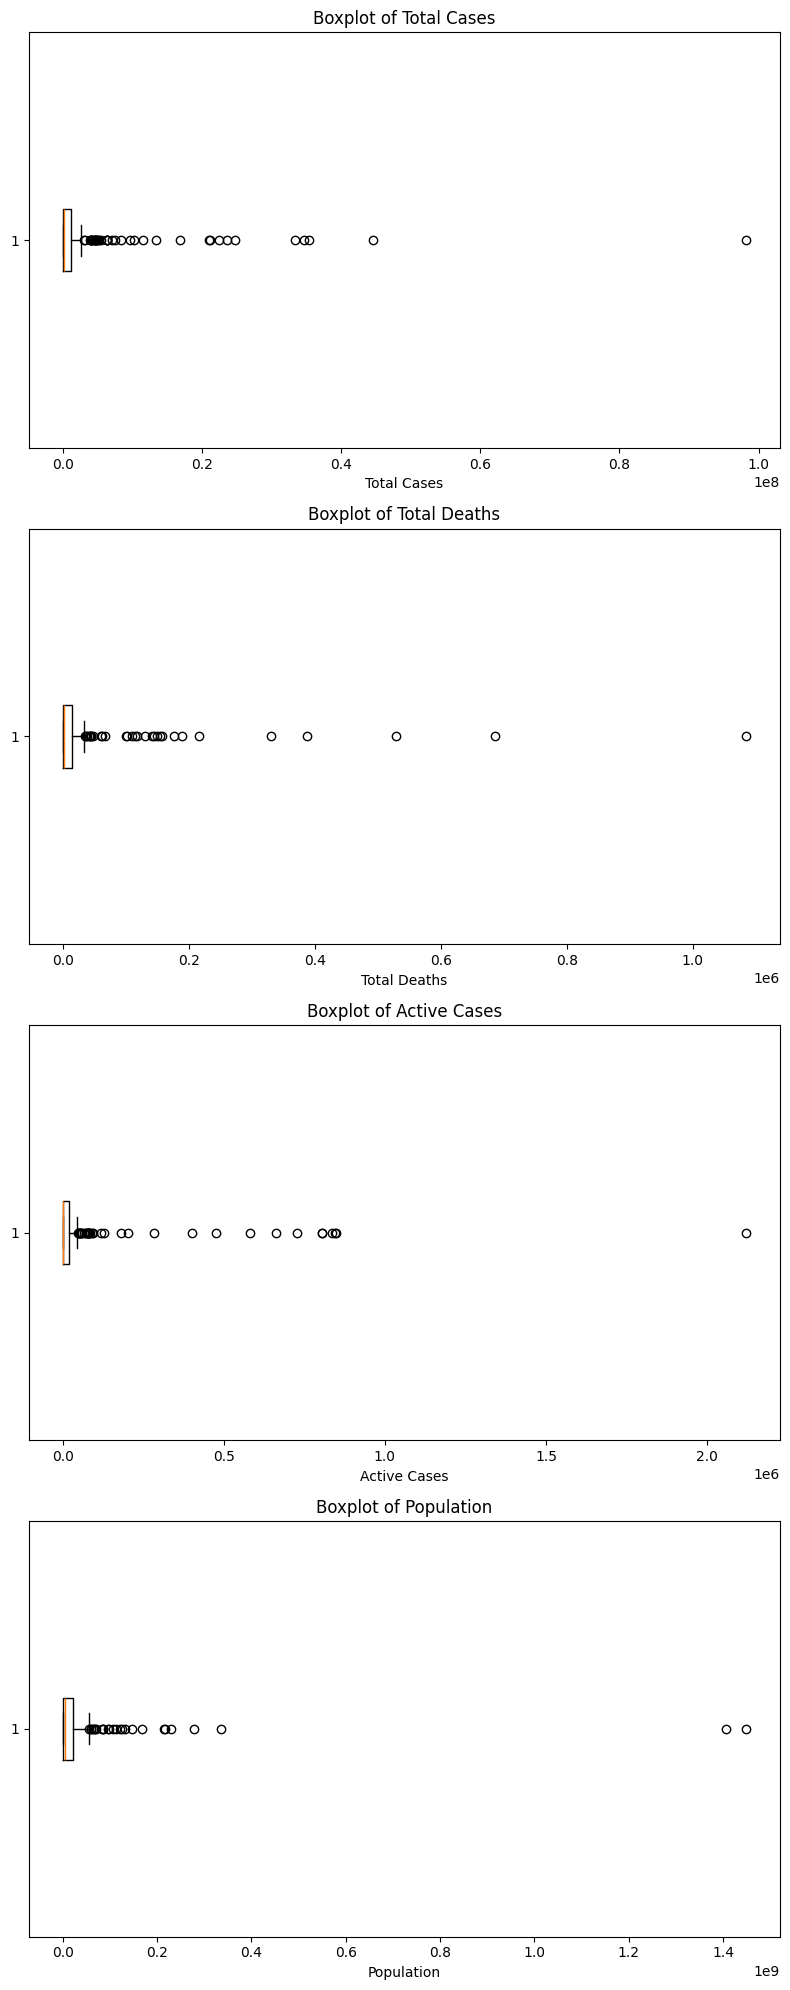

In [4]:
# Creating boxplots for Total Cases, Total Deaths, Active Cases, and Population to identify outliers
fig, axs = plt.subplots(4, 1, figsize=(8, 20))

# Boxplot for Total Cases
axs[0].boxplot(covid_data['Total_Cases'].dropna(), vert=False)
axs[0].set_title('Boxplot of Total Cases')
axs[0].set_xlabel('Total Cases')

# Boxplot for Total Deaths
axs[1].boxplot(covid_data['Total_Deaths'].dropna(), vert=False)
axs[1].set_title('Boxplot of Total Deaths')
axs[1].set_xlabel('Total Deaths')

# Boxplot for Active Cases
axs[2].boxplot(covid_data['Active_Cases'].dropna(), vert=False)
axs[2].set_title('Boxplot of Active Cases')
axs[2].set_xlabel('Active Cases')

# Boxplot for Population
axs[3].boxplot(covid_data['Population'].dropna(), vert=False)
axs[3].set_title('Boxplot of Population')
axs[3].set_xlabel('Population')

plt.tight_layout()
plt.show()


In [5]:
# Calculating correlation matrix for key numerical variables
correlation_matrix = covid_data[
    ["Total_Cases", "Total_Deaths", "Total_Recovered", "Active_Cases",
     "Cases_per_Million", "Deaths_per_Million", "Total_Tests", "Tests_per_Million", "Population"]
].corr()

# Displaying the correlation matrix
correlation_matrix


,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,Cases_per_Million,Deaths_per_Million,Total_Tests,Tests_per_Million,Population
Total_Cases,1.000000,0.890765,0.999904,0.804822,0.142422,0.209349,0.860259,0.055053,0.391914
Total_Deaths,0.890765,1.000000,0.889144,0.655613,0.020218,0.283628,0.786278,-0.005604,0.418265
Total_Recovered,0.999904,0.889144,1.000000,0.797077,0.167287,0.214559,0.861810,0.066765,0.392310
Active_Cases,0.804822,0.655613,0.797077,1.000000,0.156557,0.165970,0.583222,0.024317,0.155051
Cases_per_Million,0.142422,0.020218,0.167287,0.156557,1.000000,0.467916,0.089468,0.564781,-0.139920
Deaths_per_Million,0.209349,0.283628,0.214559,0.165970,0.467916,1.000000,0.154173,0.213097,-0.076413
Total_Tests,0.860259,0.786278,0.861810,0.583222,0.089468,0.154173,1.000000,0.204401,0.542239
Tests_per_Million,0.055053,-0.005604,0.066765,0.024317,0.564781,0.213097,0.204401,1.000000,-0.087925
Population,0.391914,0.418265,0.392310,0.155051,-0.139920,-0.076413,0.542239,-0.087925,1.000000


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Preparing the feature and target variables
features = covid_data[["Total_Cases", "Total_Deaths", "Total_Recovered", "Population"]]
target = covid_data["Active_Cases"]

# Dropping rows with NaN values in either features or target for model training
features = features.dropna()
target = target.loc[features.index]  # Ensure alignment with features after dropping NaNs

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initializing and training the Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

mae, mse


(36249.113212154996, 7257317556.048454)